<a href="https://colab.research.google.com/github/Peckkie/DPDM2021/blob/main/Chaper_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

## Generate Data

In [1]:
from sklearn.datasets import make_blobs #import datasets packet

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6) #สุ่ม X, y

## Explore data

In [3]:
X.shape

(500, 2)

In [4]:
y[:10]

array([0, 2, 2, 2, 0, 1, 0, 2, 0, 1])

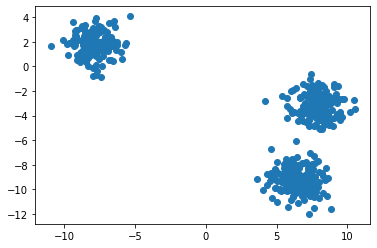

In [5]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

## Clustering

### 1 Import

In [6]:
from sklearn.cluster import KMeans

### 2 Define

In [7]:
kmeans = KMeans(n_clusters=2, random_state=6)

### 3 Fit-Predict

In [8]:
y_clust = kmeans.fit_predict(X)

In [9]:
y_clust

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

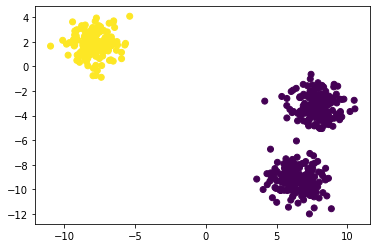

In [10]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

#### 3 clusters

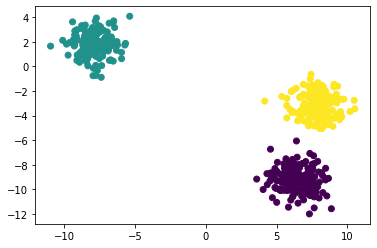

In [11]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

#### 4 clusters

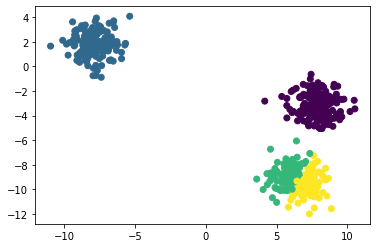

In [12]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

#### 5 clusters

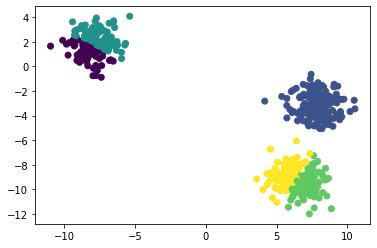

In [13]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

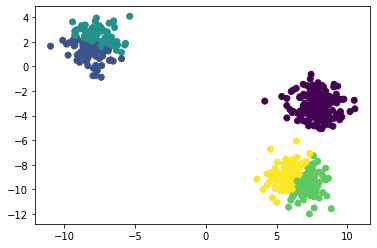

In [14]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## Example Application (Color Quantization)

In [15]:
import cv2
import os

img = cv2.imread('/content/Screen Shot 2564-10-29 at 18.24.16.png')

img.shape

(608, 921, 3)

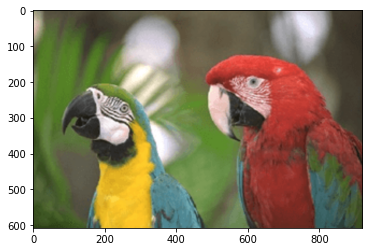

In [16]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### - นับจำนวนสี

In [17]:
import numpy as np

allcolor = np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0)
allcolor.shape

(44272, 3)

### - จัดกลุ่มสีให้เหลือ 8 สี

In [18]:
myquantize = KMeans(n_clusters=8,random_state=6) #kmeans define

แปลงข้อมูลให้อยู่ในรูป row-column

นับจำนวน pixel ในภาพ

In [19]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(559968, 3)

In [20]:
final_color = myquantize.fit_predict(allcolor) #kmeans fit-predict
final_color

array([3, 3, 3, ..., 7, 7, 7], dtype=int32)

### - ใช้ centroid เป็นตัวแทนของสี

In [21]:
centroid = myquantize.cluster_centers_

In [22]:
centroid

array([[101.32307104, 113.7257864 ,  75.60330816],
       [183.43598809, 165.7692594 , 155.39374767],
       [126.69595032, 141.42657524, 119.06093932],
       [ 71.65325806,  73.65690426,  53.64255469],
       [131.88495093,  60.67911668,  52.18429662],
       [213.32038835, 177.30582524,  49.76213592],
       [190.40797437,  87.1242435 ,  78.57244571],
       [221.89566495, 208.12637766, 204.9140338 ]])

แทนสีคืนลงไป

In [23]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

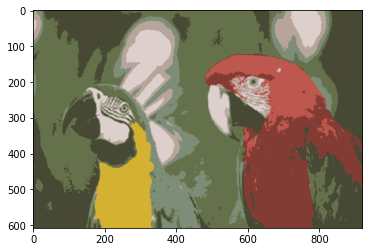

In [24]:
plt.imshow(new_img/255)

# Hierachical Clustering
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# Clustering Evaluation
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation